In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

## MI Fit Band steps analysis

In [2]:
activity_data = pd.read_excel('../data/ACTIVITY.xlsx')
activity_data.shape

(308, 5)

In [3]:
activity_data.head()

,date,steps,distance,calories,timeActive
0,2019-04-15,6158,4.28,167,01:17:00
1,2019-04-16,17791,13.67,561,03:20:00
2,2019-04-17,4889,3.51,146,01:04:00
3,2019-04-18,13788,10.47,429,02:33:00
4,2019-04-19,6303,4.43,170,01:20:00


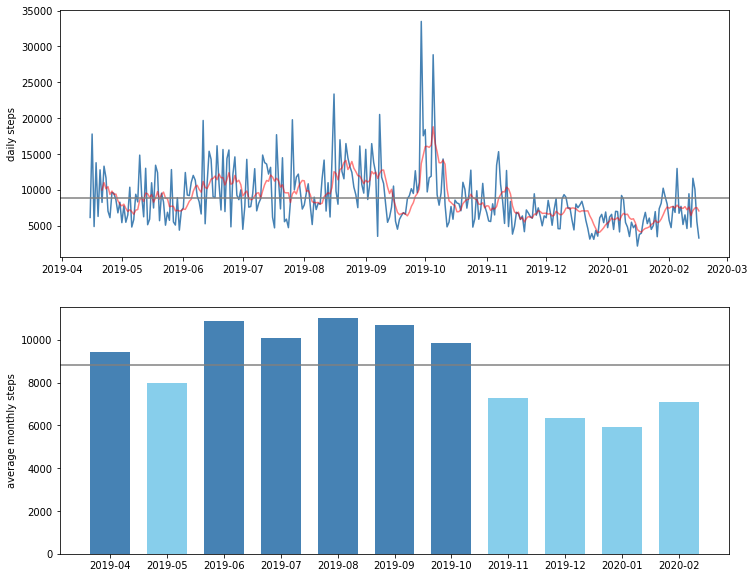

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,10))

x1 = activity_data['date']
y1 = activity_data['steps']
y1_ma = activity_data['steps'].rolling(7).mean() # 7-day moving average
y1_mean = activity_data['steps'].mean() # total mean

activity_data['year_month'] = activity_data['date'].astype(str).str[:7]
activity_data_monthly = activity_data.groupby(['year_month']).mean().reset_index()
x2 = activity_data_monthly['year_month']
y2 = activity_data_monthly['steps']

# creating daily steps line plot along with 7-day moving average and total average of steps
ax1.plot(x1, y1, color='steelblue')
ax1.plot(x1, y1_ma, color='red', alpha=0.5)
ax1.axhline(y1_mean, color='grey')
ax1.set_ylabel('daily steps')

# creating monthly steps bar chart with different coloring
colors = np.where(y2 > y1_mean, 'steelblue', 'skyblue') # check if monthly step count is higher than total average
ax2.bar(x2, y2, color=colors, width=0.7)
ax2.axhline(y1_mean, color='grey')
ax2.set_ylabel('average monthly steps')

plt.show()

In [5]:
activity_data['steps'].mean()

8823.77922077922

Insights
- to add
- to add

### Steps correlation with distance, calories and active time

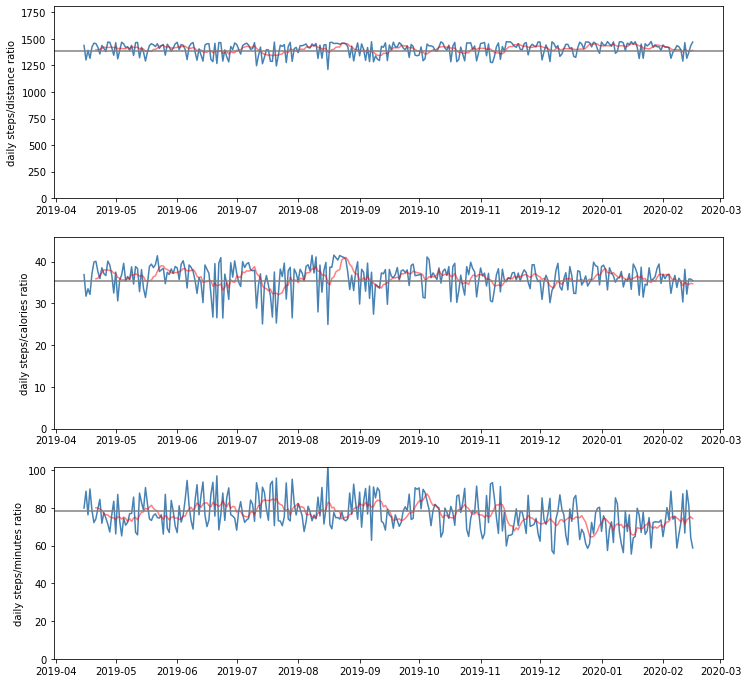

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,12))

x1 = activity_data['date']
y1 = activity_data['steps'] / activity_data['distance'] # steps per kilometer
y1_ma = y1.rolling(7).mean() # 7-day moving average
y1_mean = activity_data['steps'].mean() / activity_data['distance'].mean()

x2 = activity_data['date']
y2 = activity_data['steps'] / activity_data['calories'] # steps per calory
y2_ma = y2.rolling(7).mean() # 7-day moving average
y2_mean = activity_data['steps'].mean() / activity_data['calories'].mean()

activity_data['timeActiveSpl'] = activity_data['timeActive'].astype(str).str.split(':')
activity_data['minutes'] = activity_data['timeActiveSpl'].apply(lambda x: int(x[0]) * 60 + int(x[1]))
x3 = activity_data['date']
y3 = activity_data['steps'] / activity_data['minutes'] # steps per active minute
y3_ma = y3.rolling(7).mean() # 7-day moving average
y3_mean = activity_data['steps'].mean() / activity_data['minutes'].mean()

# creating daily line plot of steps/distance ratio along with 7-day moving average and total average
ax1.plot(x1, y1, color='steelblue')
ax1.plot(x1, y1_ma, color='red', alpha=0.5)
ax1.axhline(y1_mean, color='grey')
ax1.set_ylim(ymin=0, ymax=y1_mean * 1.3)
ax1.set_ylabel('daily steps/distance ratio')

# creating daily line plot of steps/calories ratio along with 7-day moving average and total average
ax2.plot(x2, y2, color='steelblue')
ax2.plot(x2, y2_ma, color='red', alpha=0.5)
ax2.axhline(y2_mean, color='grey')
ax2.set_ylim(ymin=0, ymax=y2_mean * 1.3)
ax2.set_ylabel('daily steps/calories ratio')

# creating daily line plot of steps/minutes ratio along with 7-day moving average and total average
ax3.plot(x3, y3, color='steelblue')
ax3.plot(x3, y3_ma, color='red', alpha=0.5)
ax3.axhline(y3_mean, color='grey')
ax3.set_ylim(ymin=0, ymax=y3_mean * 1.3)
ax3.set_ylabel('daily steps/minutes ratio')

plt.show()

In [7]:
activity_data.corr()

,steps,distance,calories,minutes
steps,1.000000,0.994335,0.960157,0.974592
distance,0.994335,1.000000,0.981396,0.948762
calories,0.960157,0.981396,1.000000,0.892785
minutes,0.974592,0.948762,0.892785,1.000000


In [8]:
activity_data['steps'].mean() / activity_data['distance'].mean()

1388.2796456922194

In [9]:
activity_data['steps'].mean() / activity_data['calories'].mean()

35.34653001768807

In [10]:
activity_data['steps'].mean() / activity_data['minutes'].mean()

78.31831935679087

Insights
- to add
- to add

### Steps analysis by weekday

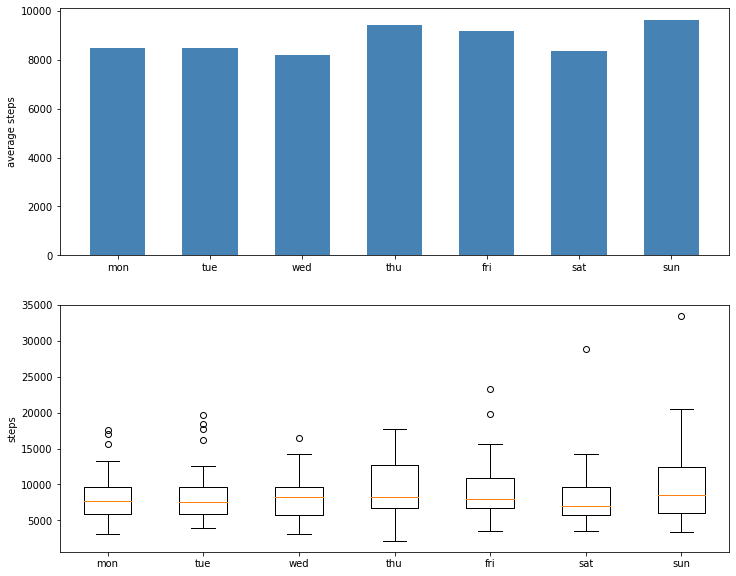

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,10))

activity_data['weekday'] = activity_data['date'].dt.dayofweek
activity_data_weekday = activity_data.groupby(['weekday']).mean().reset_index()
weekday_mapping = {0:'mon',1:'tue',2:'wed',3:'thu',4:'fri',5:'sat',6:'sun',}
x1 = activity_data_weekday['weekday'].map(weekday_mapping)
y1 = activity_data_weekday['steps']

data_mon = np.array(activity_data['steps'][activity_data['weekday'] == 0])
data_tue = np.array(activity_data['steps'][activity_data['weekday'] == 1])
data_wed = np.array(activity_data['steps'][activity_data['weekday'] == 2])
data_thu = np.array(activity_data['steps'][activity_data['weekday'] == 3])
data_fri = np.array(activity_data['steps'][activity_data['weekday'] == 4])
data_sat = np.array(activity_data['steps'][activity_data['weekday'] == 5])
data_sun = np.array(activity_data['steps'][activity_data['weekday'] == 6])
data = [data_mon, data_tue, data_wed, data_thu, data_fri, data_sat, data_sun]

# creating bar chart for steps by weekday
ax1.bar(x1, y1, color='steelblue', width=0.6)
ax1.set_ylabel('average steps')

# creating box plot for steps by weekday
ax2.boxplot(data, labels=weekday_mapping.values())
ax2.set_ylabel('steps')

plt.show()

Insights
- to add
- to add

### Steps in MI Fit Band vs Huawei

In [12]:
activity_data = pd.read_excel('../data/ACTIVITY.xlsx')
activity_data.shape

(308, 5)

In [13]:
huawei_data = pd.read_excel('../data/HUAWEI.xlsx')
huawei_data.shape

(308, 4)

In [14]:
merged_data = pd.merge(activity_data.drop('timeActive', axis=1), huawei_data, on='date', suffixes=('_mi_fit','_huawei'))
merged_data.shape

(308, 7)

In [15]:
merged_data.head()

,date,steps_mi_fit,distance_mi_fit,calories_mi_fit,steps_huawei,distance_huawei,calories_huawei
0,2019-04-15,6158,4.28,167,2713,2.05,92
1,2019-04-16,17791,13.67,561,16077,12.10,545
2,2019-04-17,4889,3.51,146,3164,2.39,108
3,2019-04-18,13788,10.47,429,10588,8.00,360
4,2019-04-19,6303,4.43,170,2967,2.24,101


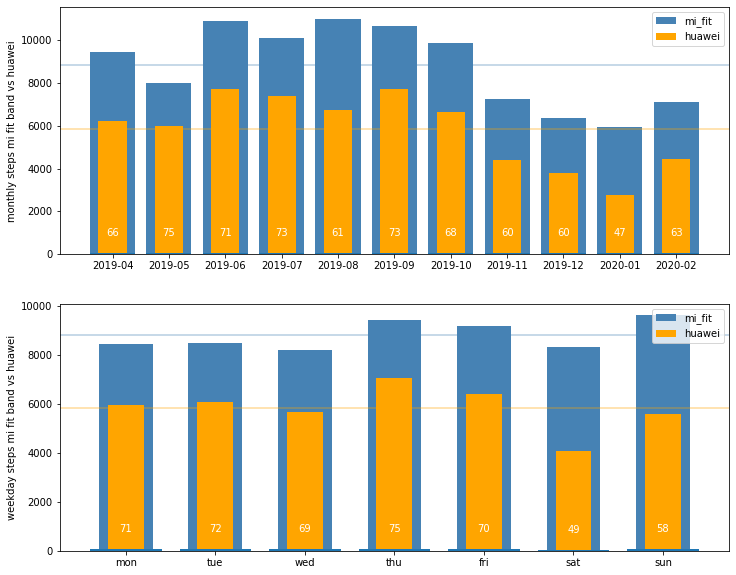

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,10))

merged_data['year_month'] = merged_data['date'].astype(str).str[:7]
merged_data_monthly = merged_data.groupby(['year_month']).mean().reset_index()
x1 = merged_data_monthly['year_month']
y1_mi_fit = merged_data_monthly['steps_mi_fit']
y1_huawei = merged_data_monthly['steps_huawei']

merged_data['weekday'] = merged_data['date'].dt.dayofweek
merged_data_weekday = merged_data.groupby(['weekday']).mean().reset_index()
weekday_mapping = {0:'mon',1:'tue',2:'wed',3:'thu',4:'fri',5:'sat',6:'sun',}
x2 = merged_data_weekday['weekday'].map(weekday_mapping)
y2_mi_fit = merged_data_weekday['steps_mi_fit']
y2_huawei = merged_data_weekday['steps_huawei']

# creating monthly steps bar chart for mi fit band vs huawei
ax1.bar(x1, y1_mi_fit, color='steelblue', label='mi_fit')
ax1.bar(x1, y1_huawei, color='orange', label='huawei', width=0.5)
ax1.axhline(merged_data['steps_mi_fit'].mean(), color='steelblue', alpha=0.4)
ax1.axhline(merged_data['steps_huawei'].mean(), color='orange', alpha=0.4)
ax1.set_ylabel('monthly steps mi fit band vs huawei')
ax1.bar_label(ax1.bar(x1, round(y1_huawei / y1_mi_fit * 100, 0)), color='white', padding=15)
ax1.legend(loc='upper right')

# creating weekday steps bar chart for mi fit band vs huawei
ax2.bar(x2, y2_mi_fit, color='steelblue', label='mi_fit', width=0.6)
ax2.bar(x2, y2_huawei, color='orange', label='huawei', width=0.4)
ax2.axhline(merged_data['steps_mi_fit'].mean(), color='steelblue', alpha=0.4)
ax2.axhline(merged_data['steps_huawei'].mean(), color='orange', alpha=0.4)
ax2.set_ylabel('weekday steps mi fit band vs huawei')
ax2.bar_label(ax2.bar(x2, round(y2_huawei / y2_mi_fit * 100, 0)), color='white', padding=15)
ax2.legend(loc='upper right')

plt.show()

In [17]:
merged_data['steps_huawei'].mean()

5848.681818181818

In [18]:
merged_data['steps_mi_fit'].mean()

8823.77922077922

In [19]:
merged_data['steps_huawei'].mean() / merged_data['steps_mi_fit'].mean()

0.662831840172144

Insights
- to add
- to add

## MI Fit Band sleep analysis

In [20]:
sleep_data = pd.read_excel('../data/SLEEP.xlsx')
sleep_data.shape

(308, 8)

In [21]:
sleep_data.head()

,date,inBedFor,deepSleep,lightSleep,timeAwake,fellAsleepAt,wokeUpAt,sleepScore
0,2019-04-15,07:23:00,02:36:00,04:47:00,1899-12-30 00:00:00,23:27:00,06:50:00,96
1,2019-04-16,08:30:00,03:23:00,05:07:00,00:02:00,21:38:00,06:10:00,96
2,2019-04-17,08:04:00,03:15:00,04:49:00,1899-12-30 00:00:00,22:53:00,06:57:00,98
3,2019-04-18,09:35:00,04:37:00,04:58:00,1899-12-30 00:00:00,21:06:00,06:41:00,93
4,2019-04-19,05:45:00,03:02:00,02:43:00,01:05:00,23:58:00,06:48:00,68


### Sleep vs time active

- Understand if activity (day before or after) is correlated with sleep

### Sleep by weekday

- Understand if weekday is affecting sleep performance